## Experimento - 1ra Unidade - Máquinas Síncronas

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from math import sqrt

In [4]:
# Curva CA
Vt_ca = np.array([7.4, 45.0, 65.9, 100.0, 117.8, 131.6, 142.0, 152.0, 158.2])
If_ca = np.array([0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.78])

# Curva CC
If_cc = np.array([0.0, 0.1, 0.2, 0.3])
Ia_cc = np.array([0.36, 2.2, 4.08, 6.11])

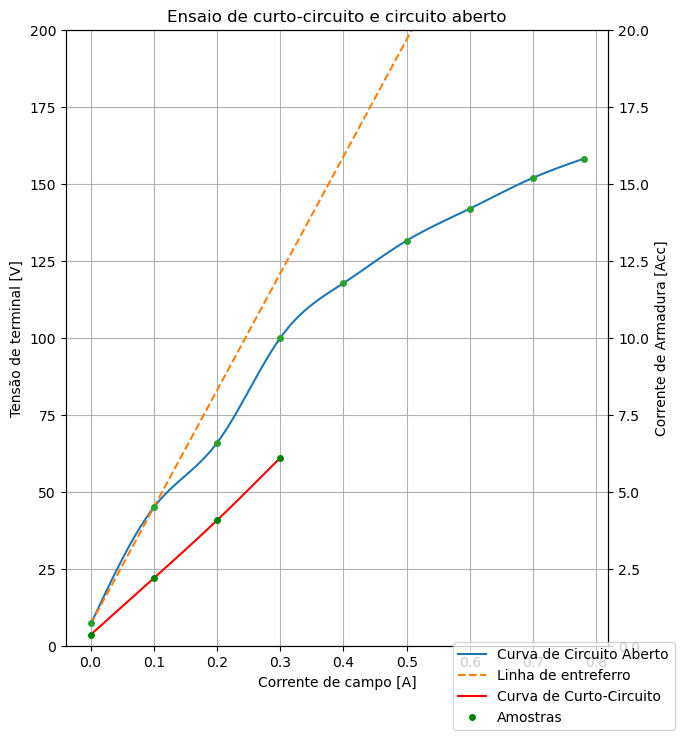

In [24]:
# Interpolação dos dados do ensaio de circuito aberto e ensaio de curto-circuito
curva_ca = CubicSpline(If_ca, Vt_ca, bc_type = 'natural')
curva_cc = CubicSpline(If_cc, Ia_cc, bc_type = 'natural')

# Interpolação com os dois primeiros pontos para extrair a característica linear
linha_entreferro = CubicSpline(If_ca[:2], Vt_ca[:2], bc_type = "natural")

# Intervalos para o gráfico
n_amostras = 100 # Número de pontos para o gráfico
CA = np.linspace(0, np.max(If_ca), n_amostras)
CC = np.linspace(0, np.max(If_cc), n_amostras)

# Configuração do gráfico
fig,ax1 = plt.subplots(figsize = (7,8))
ax1.set_title('Ensaio de curto-circuito e circuito aberto')
ax1.set_xlabel('Corrente de campo [A]')
ax1.set_ylabel('Tensão de terminal [V]')
ax1.grid(True)

# Traçando as curvas
ax1.plot(CA, curva_ca(CA), label = 'Curva de Circuito Aberto')
ax1.plot(CA, linha_entreferro(CA),linestyle = 'dashed', label = 'Linha de entreferro')
ax1.plot(If_ca, Vt_ca, marker='o', linestyle='None', ms=4)
ax1.set_ylim(0,200)


ax2 = ax1.twinx()
ax2.set_ylabel('Corrente de Armadura [Acc]')
ax2.plot(CC, curva_cc(CC),color = 'red' ,label = 'Curva de Curto-Circuito')
ax2.plot(If_cc, Ia_cc, marker='o', color = 'green', linestyle='None', ms=4, label='Amostras')
ax2.set_ylim(0,20)


fig.legend(loc='lower right')

---

### Determine a reatância síncrona não saturada ($X_{s_{(ns)}}$) e saturada ($X_{s_{(s)}}$)

Determinação de $X_{s_{(ns)}}$: 

1. Escolher um valor sobre a linha de entreferro
2. Verificar a corrente de armadura correspondente a excitação
3. Encontrar a reatância pela razão entre as grandezas

In [30]:
# Características nominais da máquina
Vt_nominal = 220 # Volts [V] (Trifásica)
S_nominal = 2e3 # Volt-Ampere [VA]

Ia_nominal = S_nominal / (sqrt(3) * Vt_nominal)

5.24863881081478


In [73]:
linha_entreferro_Vt_x_If = CubicSpline(Vt_ca[:2], If_ca[:2],  bc_type = "natural")

# Excitação corresponde a tensão nominal, considerando a caracteristica linear
If_linear = linha_entreferro_Vt_x_If(Vt_nominal)
Ia_linear = curva_cc(If_linear)

Xs_nao_saturada = (Vt_nominal / sqrt(3)) / Ia_linear

print(f'O valor da Reatância Sincrona Não Saturada é igual a {Xs_nao_saturada} ohms/fase')

Xs_saturada = (Vt_nominal / sqrt(3)) / Ia_nominal

print(f'O valor da Reatância Sincrona Saturada é igual a {Xs_saturada} ohms/fase')

O valor da Reatância Sincrona Não Saturada é igual a 11.718539198919167 ohms/fase
O valor da Reatância Sincrona Saturada é igual a 24.2 ohms/fase


---

### Trace as curvas do gerador síncrono operando com carga e com controle de tensão e comente os resultados a partir dos dados coletados

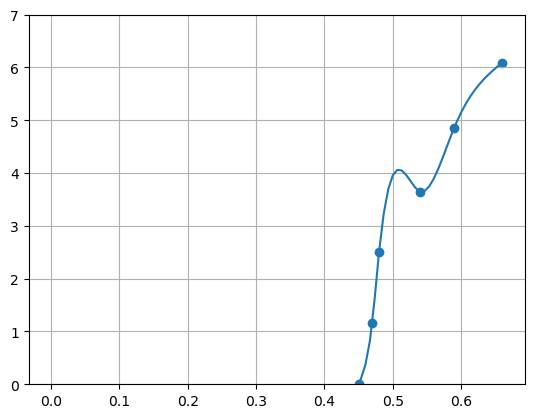

In [114]:
# Dados coletados no ensaio 

Pot_lampadas = np.array([0, 450, 900, 1350, 1800, 2250])
If_ensaio_4 = np.array([0.45, 0.47, 0.48, 0.54, 0.59, 0.66])
Ia_ensaio_4 = np.array([0, 1.17, 2.51, 3.65, 4.86, 6.09]) 

curva_excitacao = CubicSpline(If_ensaio_4, Ia_ensaio_4, bc_type= 'natural')

# Intervalos para o gráfico
If = np.linspace(0, np.max(If_ensaio_4), n_amostras)

plt.plot(If, curva_excitacao(If))
plt.scatter(If_ensaio_4, Ia_ensaio_4)
# plt.xlim(0, np.max(If_ensaio_4))
plt.ylim(0,7)
plt.grid(True)

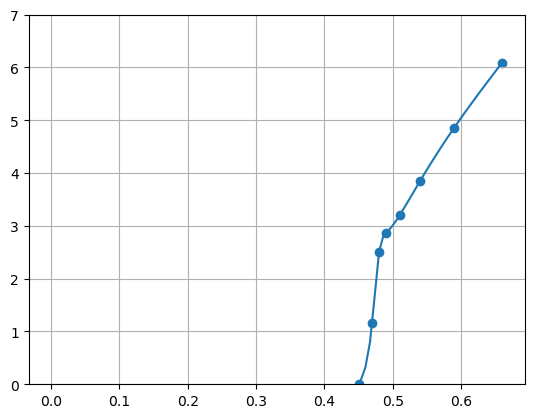

In [115]:
# Dados coletados no ensaio 

Pot_lampadas = np.array([0, 450, 900, 1350, 1800, 2250])
If_ensaio_4 = np.array([0.45, 0.47, 0.48,0.49, 0.51, 0.54,0.59, 0.66])
Ia_ensaio_4 = np.array([0, 1.17, 2.51,2.87, 3.2, 3.85, 4.86, 6.09]) 

curva_excitacao = CubicSpline(If_ensaio_4, Ia_ensaio_4, bc_type= 'natural')

# Intervalos para o gráfico
If = np.linspace(0, np.max(If_ensaio_4), n_amostras)

plt.plot(If, curva_excitacao(If))
plt.scatter(If_ensaio_4, Ia_ensaio_4)
# plt.xlim(0, np.max(If_ensaio_4))
plt.ylim(0,7)
plt.grid(True)

In [ ]:
from scipy.optimize import curve_fit

# equação de hiperbole
def Ia_equation (If, a, b):
    return sqrt((If**2 / a**2) - 1) * b

params, _ = curve_fit(Ia_equation, If_ensaio_4, Ia_ensaio_4, p0 = [1,1])